In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
URL = "bbc-text.csv"

In [3]:
#another Method to read csv
# category=[]
# text=[]
# with open(URL,'r') as csv_read:
#     read=csv.reader(csv_read,delimiter=',')
#     next(read)
#     for i,k in read:
#         category.append(i)
#         text.append(k)
#

In [4]:
data=pd.read_csv(URL)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
data.isnull().any()

category    False
text        False
dtype: bool

In [6]:
data.isna().any()

category    False
text        False
dtype: bool

In [7]:
data[data.category.str.len()==0]

,category,text


In [8]:
data[data.text.str.len()==0]

,category,text


In [9]:
labels=data.category.unique().tolist()
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [10]:
tech_news=data[data.category =='tech'].count()[0]
tech_news

401

In [11]:
business_news=data[data.category =='business'].count()[0]
business_news

510

In [12]:
sports_news = data[data.category =='sport'].count()[0]
sports_news

511

In [13]:
entr_news=data[data.category =='entertainment'].count()[0]
entr_news

386

In [14]:
politics_news=data[data.category =='politics'].count()[0]
politics_news

417

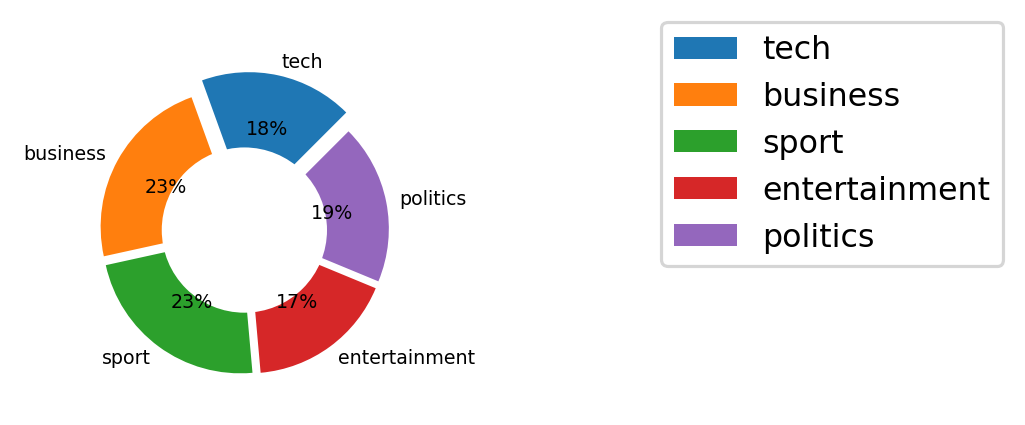

In [15]:
#pie chart visualisation of category of NEWS
size=[tech_news,business_news,sports_news,entr_news,politics_news]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.05, 0.05, 0.05,0.05]
plt.pie(size,labels=labels,textprops={'fontsize':6},startangle=45,autopct='%1.0f%%', explode=offset)

centre_circle = plt.Circle((0, 0), radius=0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor =(2.75, 1.15))
plt.show()

# Preprocessing + NLP

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [17]:
#Label Encoding of Catagory into respective numaric value
data.category.replace(labels,[0,1,2,3,4],inplace=True)

In [18]:
data.head()

,category,text
0,0,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,3,ocean s twelve raids box office ocean s twelve...


In [19]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "us","up", "very", "was", "we", "we'd", "we'll", "we're", "we've","will","well","shall", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you","your's" "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves","one","two","three","four","five","six","seven","ten","eight","nine","hundred","thousand","million","billion","doller","time","year","date"]
stopwords.sort()

In [20]:
# continue
# hold
# remain
# occur
# means
# one
#"time" 
#"year"
#'take' 

In [21]:
var={}
var['<00v>']=0
index_=1
def cleaning(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words
def Word_Embedding(words):
    global var
    global index_
    for word in words:
        if word in var:
            continue
        else:
            var[word]=index_
            index_+=1

# Train Test Validation Split 
##### Ratio 6:2:2

In [22]:
X_train = data.text[:1335]
X_valid = data.text[1335:1780]
X_test  = data.text[1780:]

In [23]:
y_train = data.category[:1335]
y_valid = data.category[1335:1780]
y_test  = data.category[1780:]

In [24]:
X_train.shape

(1335,)

In [25]:
y_train.head()

0    0
1    1
2    2
3    2
4    3
Name: category, dtype: int64

## Cleaning and Word Embedding

In [26]:
%%time
X_train = X_train.apply(cleaning)

X_valid = X_valid.apply(cleaning)
X_test = X_test.apply(cleaning)

CPU times: user 18.1 s, sys: 21.2 ms, total: 18.1 s
Wall time: 18.1 s


In [27]:
X_test

1780    [hobbit, pictur, year, away, lord, ring, direc...
1781    [game, firm, hold, cast, audit, video, game, f...
1782    [clark, plan, migrant, point, scheme, anyon, p...
1783    [radcliff, compet, london, paula, radcliff, co...
1784    [serena, becom, world, number, serena, william...
                              ...                        
2220    [car, pull, retail, figur, retail, sale, fell,...
2221    [kilroy, unveil, immigr, polici, exchatshow, h...
2222    [rem, announc, new, glasgow, concert, band, re...
2223    [polit, squabbl, snowbal, s, becom, commonplac...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 445, dtype: object

# Creating A Word Cloud

In [28]:
from PIL import Image
from wordcloud import WordCloud

In [29]:
WC_Tokens=X_train.to_list()
WC_Tokens=sum(WC_Tokens,[])

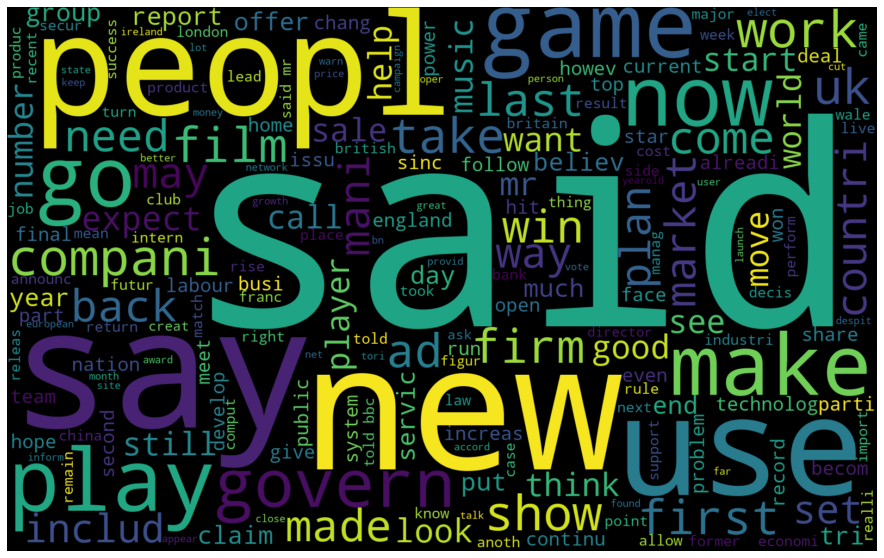

In [30]:
plt.figure( figsize=(20,10) )
word_cloud = WordCloud(width=1600, height=1000).generate(" ".join(WC_Tokens))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)

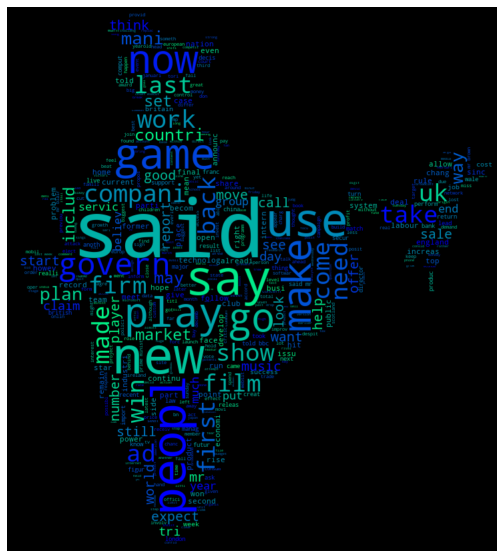

In [31]:
img=Image.open("Wordcloud/India.png")
image_mask = Image.new(mode='RGB', size=img.size, color=(255, 255, 255))
image_mask.paste(img, box=img)
rgb_array = np.array(image_mask) # converts the image object to an array
plt.figure( figsize=(20,10) )
word_cloud = WordCloud(mask=rgb_array, background_color='black', 
                      max_words=500, colormap='winter').generate(" ".join(WC_Tokens))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)

In [32]:
#Word Embedding only in train
X_train.apply(Word_Embedding)

0       None
1       None
2       None
3       None
4       None
        ... 
1330    None
1331    None
1332    None
1333    None
1334    None
Name: text, Length: 1335, dtype: object

In [33]:
print(f"There are total  {len(var)} in Our Words Dictonary")

There are total  17331 in Our Words Dictonary


In [34]:
#average no of Words in News article
X_train.apply(len).mean(),X_train.apply(len).max(),X_train.apply(len).min()

(221.58501872659176, 2288, 47)

# Create a Sparse Matrix for the Given Data

In [35]:
WORDS = 300

In [36]:
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [37]:
print(f'\'{X_train[50][50]}\' is present at index {var[X_train[50][50]]} in our Word Embedding')
print(f'\'{X_train[250][20]}\' is present at index {var[X_train[250][20]]} in our Word Embedding')
print(f'\'{X_train[1150][50]}\' is present at index {var[X_train[1150][50]]} in our Word Embedding')

'let' is present at index 1292 in our Word Embedding
'edelman' is present at index 7592 in our Word Embedding
'fundament' is present at index 2763 in our Word Embedding


In [38]:
%%time
train_sparse = np.zeros(shape=(X_train.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(train_sparse.shape[0]):
    for j in range(train_sparse.shape[1]):
        try:
            train_sparse[i][j]=var.get(X_train[i][j],0)
        except:
            train_sparse[i][j] = 0
    

CPU times: user 4.14 s, sys: 0 ns, total: 4.14 s
Wall time: 4.14 s


In [39]:
train_sparse

array([[   1,    2,    3, ...,  193,  194,  195],
       [ 247,  248,  249, ...,    0,    0,    0],
       [ 355,  356,  357, ...,    0,    0,    0],
       ...,
       [2405, 2406, 4808, ...,    0,    0,    0],
       [8717,  616,  242, ...,  451, 1334,  331],
       [2017, 1905, 2009, ...,    0,    0,    0]])

In [40]:
train_sparse[5]

array([675, 638, 406, 676, 677, 678, 675, 137, 277, 339, 679, 680, 440,
       681,  62, 682, 676,  29, 683, 684, 685, 686, 236, 687,  63, 688,
       452, 524, 137, 683,  63, 689, 690, 691, 680, 638,   5, 188, 679,
       260, 277, 680, 690, 692, 231, 693, 694, 201, 695, 696, 192, 697,
       698, 684, 188, 675, 137, 188, 679, 440, 699, 124, 121, 382,  63,
       116,  40, 188, 675,  63, 700, 701,  63, 692, 702,  96, 703, 704,
       254, 680, 440, 705,  62, 682, 676,  69, 685, 685, 706, 188, 675,
       124, 687, 683, 707, 360, 707, 277, 707, 708, 306, 425, 709, 710,
       711, 712, 713, 714, 715, 339, 679, 224, 238, 676, 548, 716, 185,
       694, 201, 695, 696, 192, 697, 698, 684, 717, 718, 719, 720, 721,
       188, 675,  63, 267, 201, 382,  63, 722,  40, 683,  89, 684, 723,
       724, 288, 186,  17, 725, 678, 675,  63,  12, 726, 288,  96,  71,
       703,  77, 204, 217, 117, 150, 395, 727, 728, 729, 730, 188, 675,
       137, 680, 731, 732, 733, 734, 570, 735, 736, 737, 738, 73

In [41]:
%%time
valid_sparse = np.zeros(shape=(X_valid.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(valid_sparse.shape[0]):
    for j in range(valid_sparse.shape[1]):
        try:
            valid_sparse[i][j]=var.get(X_valid[i][j],0)
        except:
            valid_sparse[i][j] = 0


CPU times: user 1.23 s, sys: 36 µs, total: 1.23 s
Wall time: 1.23 s


In [42]:
valid_sparse[15]

array([ 2762,  2547,  4054,  1537,   160,  2762,  2547,   127,   885,
        1797,   294,  8987,  4054,  1759,  1995,    38,  2324,  7363,
       11739,   137,   614,     0,  1995,    21,   738,  3328, 16641,
        1066, 11739,   137,   345,   118,  1933,  1975,  8518,  1303,
        1995,    63,  1466,   137,  9821,   262,   295,   297,   395,
         360,  1329,   716,   297,  9639,   160,   993,  1210,  2477,
        1451,  4382,  1518,   345,  1297,  1388,  5941,  2706,   340,
        3904,  1554,  1995,    63,   126, 11739,   137,   927,   160,
         614,    21,   392,  1359,   799,  2762,  2547,  1226,  1917,
        3916,   148,   991,   379,  1312,   909,   716,   377,  1325,
         127,   885,  1797,   185, 10499,   821,    89,  1871,   125,
        1320,  1995,  2762,  2547,  1772,   173,  4272,  2795,   441,
        2706,  1995,    79,    69,  2156,   988,   482,  1063,  1324,
        1979,   345,   118,    80,  1919,  2477,    63,   602,  1094,
        1936,  7525,

In [43]:
%%time
test_sparse = np.zeros(shape=(X_test.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(test_sparse.shape[0]):
    for j in range(test_sparse.shape[1]):
        try:
            test_sparse[i][j]=var.get(X_test[i][j],0)
        except:
            test_sparse[i][j] = 0

CPU times: user 1.15 s, sys: 3.93 ms, total: 1.16 s
Wall time: 1.16 s


In [44]:
test_sparse[2]

array([ 2017,   754, 11186,  1288,  2367,  2018,   754,    13,    65,
         848,  2561,   691,    90,  1922,   703,     5,   718,  2016,
        2017,   137,   726,  1288,     7,  1645,   951,    63,  1355,
         755,     7,   754,   680,   188,  2017,  5943,   754,   285,
         137,  2907,  1696,   169,    65,   844,  1842,  1053,  2854,
        2855,   360,   319,   754,   680,  6073,  3939,   137,   687,
        1407,  1512,   153,   128,  1220,   687,  6072,   137,   884,
        2459,   153,   683,   701,  1449,  3163,    21,    89,    79,
        1885,   734,   680,  3387,   755,     5,   718,   137,    73,
         134,  1218,  3116,  1812,    65,  5125,  1975,  1059,    90,
         185,  2327,   703,  1492,   121,    63,  5999,  6000,   137,
        2907, 11186,   364,  1165,   703,   782,  1842,  1053,   844,
        1059,    89,  1679,  4986,  1437,   137,  5997,     7,   319,
         418,  2114,   327,    17,   851,   773,   173,   703,  1059,
         773,   343,

##### Ab <i>DANGAL</i> hoga

# Model

In [45]:
import tensorflow as tf

/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(var),output_dim=20,input_length=WORDS))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=36,activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(units=5,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 20)           346620    
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 36)                216036    
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 185       
Total params: 562,841
Trainable params: 562,841
Non-trainable params: 0
_________________________________________________________________


In [48]:
#complile Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
#hyperparamenters
num_epochs = 15
history = model.fit(train_sparse, y_train, epochs=num_epochs, validation_data=(valid_sparse, y_valid), verbose=2)

Train on 1335 samples, validate on 445 samples
Epoch 1/15
1335/1335 - 1s - loss: 1.5976 - acc: 0.2442 - val_loss: 1.5716 - val_acc: 0.2989
Epoch 2/15
1335/1335 - 0s - loss: 1.5184 - acc: 0.3468 - val_loss: 1.4982 - val_acc: 0.4225
Epoch 3/15
1335/1335 - 1s - loss: 1.3475 - acc: 0.4577 - val_loss: 1.2230 - val_acc: 0.6584
Epoch 4/15
1335/1335 - 1s - loss: 0.9899 - acc: 0.6367 - val_loss: 0.7372 - val_acc: 0.8247
Epoch 5/15
1335/1335 - 1s - loss: 0.6443 - acc: 0.7596 - val_loss: 0.4141 - val_acc: 0.9371
Epoch 6/15
1335/1335 - 1s - loss: 0.4861 - acc: 0.7978 - val_loss: 0.2882 - val_acc: 0.9461
Epoch 7/15
1335/1335 - 0s - loss: 0.4019 - acc: 0.8262 - val_loss: 0.2162 - val_acc: 0.9506
Epoch 8/15
1335/1335 - 0s - loss: 0.3448 - acc: 0.8457 - val_loss: 0.1775 - val_acc: 0.9596
Epoch 9/15
1335/1335 - 1s - loss: 0.3354 - acc: 0.8449 - val_loss: 0.1561 - val_acc: 0.9596
Epoch 10/15
1335/1335 - 1s - loss: 0.3284 - acc: 0.8337 - val_loss: 0.1398 - val_acc: 0.9596
Epoch 11/15
1335/1335 - 1s - los

# Visualizing The results

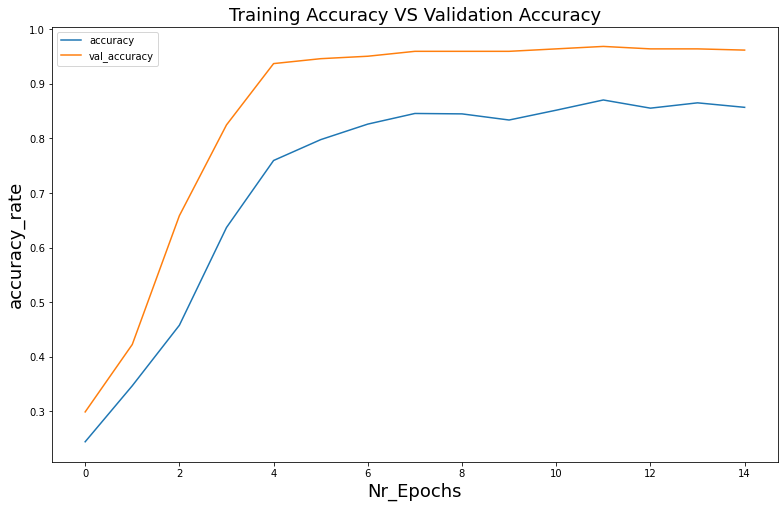

In [50]:
plt.figure(figsize=(13,8))
plt.title("Training Accuracy VS Validation Accuracy",fontsize=18)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('accuracy_rate',fontsize=18)
plt.legend(['accuracy', 'val_accuracy'])
#plt.legend(bbox_to_anchor =(2.75, 1.15))
plt.show()

In [51]:
history.history

{'loss': [1.5976263987437616,
  1.5183691618594337,
  1.3474940274092142,
  0.9899490580130159,
  0.6442759358481075,
  0.4860953210668171,
  0.401865801326791,
  0.34479840931374484,
  0.3353663707047366,
  0.3283757763632228,
  0.3091970353983761,
  0.26978081626615275,
  0.28741128797388255,
  0.26349752051999953,
  0.2708634760942352],
 'acc': [0.24419476,
  0.34681648,
  0.4576779,
  0.63670415,
  0.7595506,
  0.7977528,
  0.82621723,
  0.8456929,
  0.8449438,
  0.83370787,
  0.8516854,
  0.870412,
  0.8554307,
  0.8651685,
  0.8569288],
 'val_loss': [1.5716192783934346,
  1.498172317194135,
  1.222979662391577,
  0.7372364472807124,
  0.4141459143563603,
  0.2882083138723052,
  0.21623022221447377,
  0.17753919203964513,
  0.1560819227206573,
  0.1397569033285875,
  0.12678532465622666,
  0.11578484221958042,
  0.1126952664570862,
  0.10814029711685824,
  0.10828797814300221],
 'val_acc': [0.2988764,
  0.4224719,
  0.65842694,
  0.8247191,
  0.93707865,
  0.9460674,
  0.9505618,


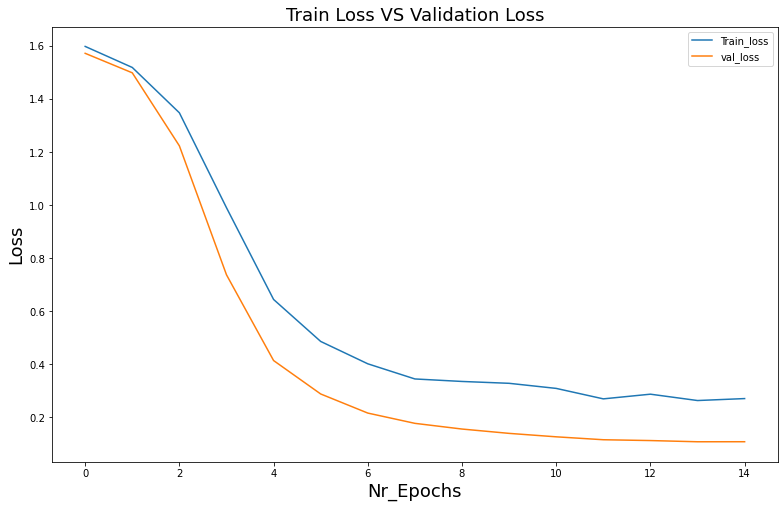

In [52]:
plt.figure(figsize=(13,8))
plt.title("Train Loss VS Validation Loss",fontsize=18)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(['Train_loss', 'val_loss'])
plt.show()

<code>
    Observation :
    A- (Nr_epochs = 10)
    1- By Adding Dropout Layer Train Accuracy decrease to 87 % which was 100%
    2- By Adding Dropout Layer Validation Accuracy remain to 95%
    3- This Signify that Our Model is Performing better in Validation Data which is Good 
        Result
    
    B- By increasing Epoch to 15 from 10 
        Both Train Accuracy and  Validation Accuracy increases by 2%
    </code>

In [53]:
y_test=y_test.reset_index(drop=True)

In [54]:
prediction_test = model.predict(test_sparse)
prediction_test[0]

array([0.00353715, 0.00383126, 0.0119908 , 0.97430646, 0.00633443],
      dtype=float32)

In [55]:
corr = 0
incorr = 0
for i in range(y_test.shape[0]):
    if np.argmax(prediction_test[i]) ==y_test[i]:
        corr += 1
    else:
        incorr += 1


In [56]:
Percent_Correct_pred = corr / (corr+incorr) * 100
Percent_Correct_pred

98.42696629213484

In [57]:
Percent_Error_pred = incorr / (corr + incorr) *100
Percent_Error_pred

1.5730337078651686

In [58]:
#inferance :
print("Accuracy Of Model is ", Percent_Correct_pred)

Accuracy Of Model is  98.42696629213484


# Model 2 Naive Bayes

###### Here we are using MultinomialNB

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score

In [60]:
def preprocessing(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return " ".join(filtered_words)

Basics = https://kavita-ganesan.com/how-to-use-countvectorizer/#.X2NfctnhW5c

CountVectorizer = https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Execution = https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [61]:
# 1- The goal of MIN_DF is to ignore words that have very few occurrences to be considered meaningful
# 2- MAX_DF is to ignore words that are too common (0.0 - 1.0)
# 3- The default tokenization in CountVectorizer removes all special characters, 
#    punctuation and single characters. If this is not the behavior you desire, 
#    and you want to keep punctuation and special characters, 
#    you can provide a custom tokenizer to CountVectorizer
# 4- Custom Preprocessing preprocessor=cleaning
# 5 -Working With N-Grams
vector = CountVectorizer(stop_words=stopwords,preprocessor=preprocessing)
#vector.get_stop_words()
vector.build_analyzer()

functools.partial(<function _analyze at 0x7fe867064290>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(preprocessor=<function preprocessing at 0x7fe860656710>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'billion', 'both', 'but', 'by', 'could',
                            'date', 'did', 'do', 'does', ...])>, tokenizer=<built-in method findall of re.Pattern object at 0x7fe86064f030>, preprocessor=<function preprocessing at 0x7fe860656710>, decoder=<bound method _VectorizerMixin.decode of CountVectorizer(preprocessor=<function preprocessing at 0x7fe860656710>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
               

In [62]:
#vector.get_params()

In [63]:
vector.build_preprocessor()

<function __main__.preprocessing(message)>

In [64]:
#fit_transform(raw_documents[, y])   >>    Learn the vocabulary dictionary and return document-term matrix.

In [65]:
%%time
data_cleaned = vector.fit_transform(data.text)

CPU times: user 20.2 s, sys: 29.6 ms, total: 20.3 s
Wall time: 20.3 s


In [66]:
#vector.get_feature_names()

In [67]:
# get the total vocab
#print(vector.vocabulary_)

In [68]:
#vector.fit_transform([data.text[0],data.text[1],data.text[2]])

#### All data is Stored in "data_cleaned" in Compressed Sparse Row format 
for more details about CSR :

In [69]:
X_train = data_cleaned[:1335]
X_valid = data_cleaned[1335:1780]
X_test  = data_cleaned[1780:]

In [70]:
y_train = data.category[:1335]
y_valid = data.category[1335:1780]
y_test  = data.category[1780:]

In [71]:
#setup the Classifier
classifier = MultinomialNB()

In [72]:
#fitting
classifier.fit(X_train, y_train)

MultinomialNB()

In [73]:
nr_correct_train = (y_train == classifier.predict(X_train)).sum()
nr_correct_train

1328

In [74]:
nr_incorrect_train = y_train.size - nr_correct_train
nr_incorrect_train

7

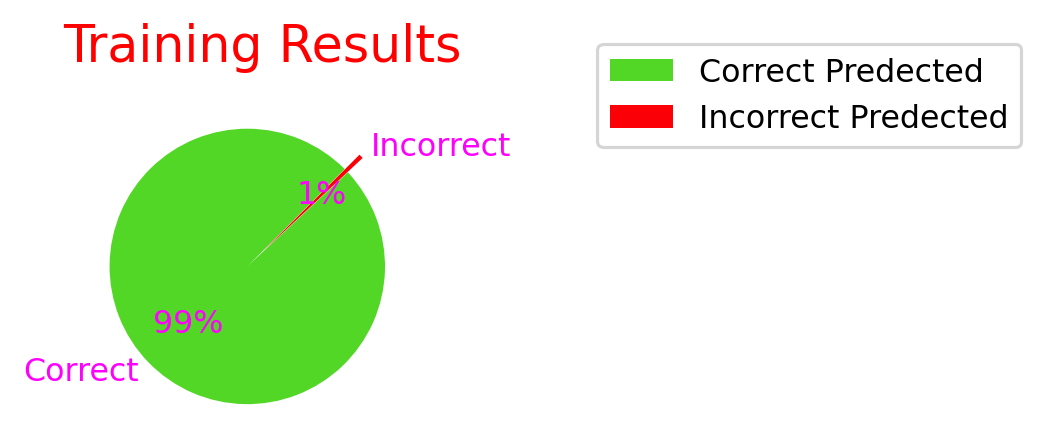

In [75]:
#pie chart visualisation of Results of Validation data
size=[nr_correct_train,nr_incorrect_train]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#52D726","#FB0007"])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

In [76]:
nr_correct_valid = (y_valid == classifier.predict(X_valid)).sum()
nr_correct_valid

429

In [77]:
nr_incorrect_valid = y_valid.size - nr_correct_valid
nr_incorrect_valid

16

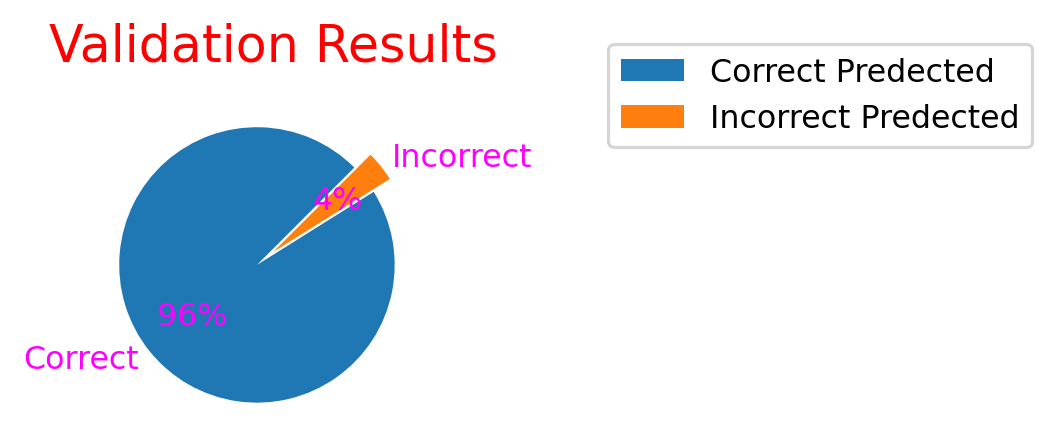

In [78]:
#pie chart visualisation of Results of Validation data
size=[nr_correct_valid,nr_incorrect_valid]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset)
plt.title("Validation Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

# KNeighborsClassifier

Other Similar Algorithms : https://scikit-learn.org/stable/modules/multiclass.html

<p>
We'll Again Use same <br>
X_train, y_train<br>
X_test, y_test<br>
X_valid, y_valid      data <br></p.

In [79]:
y_test = y_test.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [81]:
transformer = TfidfTransformer()
X_train_new= transformer.fit_transform(X_train)

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)

In [83]:
knn_fit=knn.fit(X_train_new,y_train)

In [84]:
prediction_knn_valid = knn.predict(X_valid)

In [85]:
nr_correct_knn_valid = (y_valid == prediction_knn_valid).sum()
nr_incorrect_knn_valid = y_valid.shape[0] - nr_correct_knn_valid

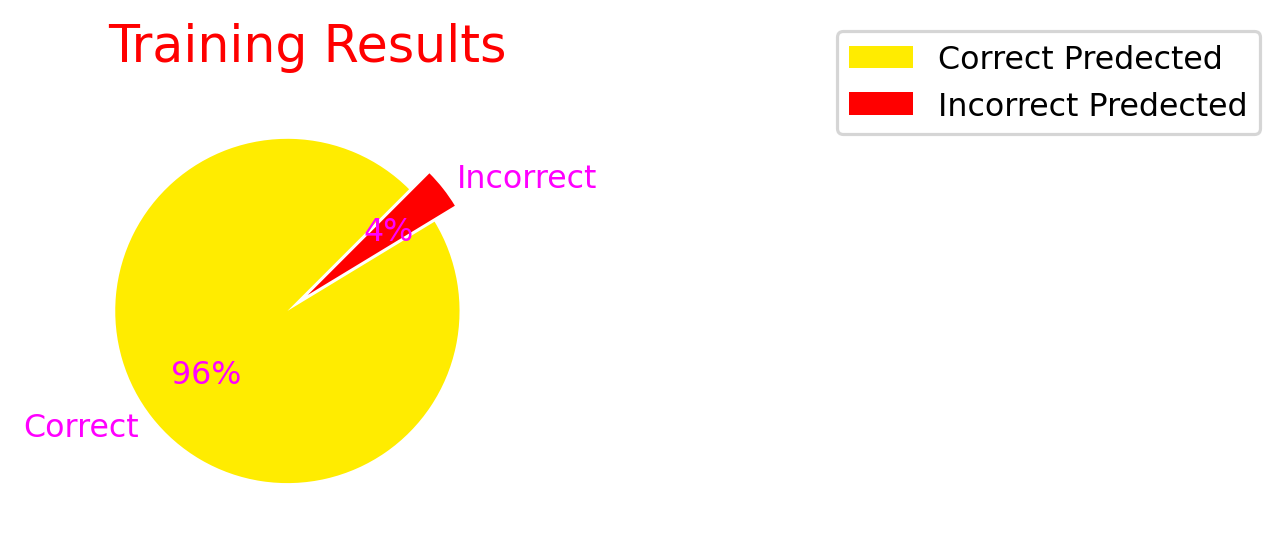

In [86]:
#pie chart visualisation of Results of Training data

size=[(y_train == knn.predict(X_train)).sum(),(y_train != knn.predict(X_train)).sum()]
plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#FFEC00",'red'])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

In [87]:
cf_valid=confusion_matrix(y_valid,knn.predict(X_valid))
cf_valid

array([[81,  1,  0,  2,  0],
       [ 3, 71,  1,  1,  9],
       [ 3,  3, 96,  0,  0],
       [ 1,  1,  1, 72,  6],
       [ 1,  1,  0,  1, 90]])

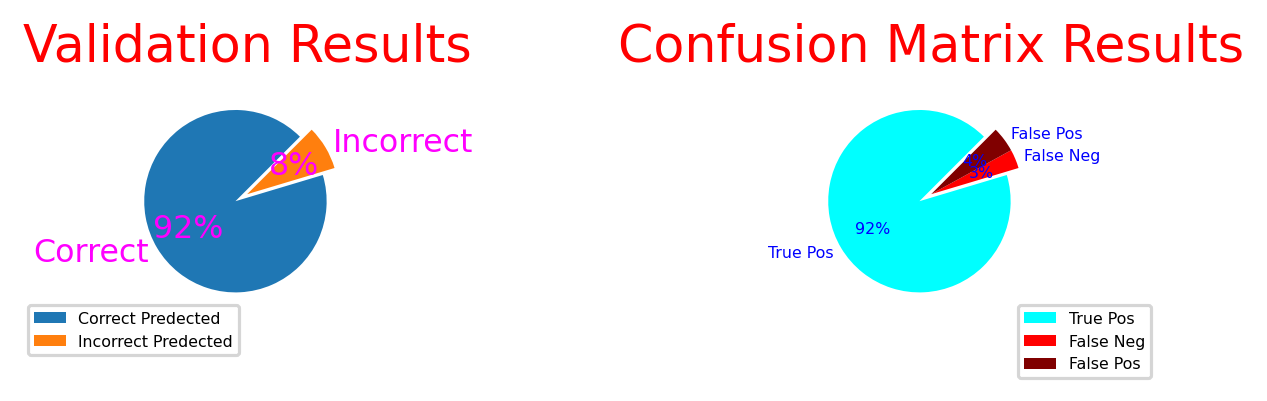

In [88]:
#pie chart visualisation of Results of Validation data
fig=plt.figure(figsize=(2,2),dpi=228)
ax3 = fig.add_axes([0, 0, .5, .5], aspect=1)
offset = [0.15, 0.00]
ax3.pie([(y_valid == knn.predict(X_valid)).sum(),(y_valid != knn.predict(X_valid)).sum()],labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset)
ax3.set_title("Validation Results",fontdict={"size":16,"color":'red'})
ax3.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})



size=[abs(cf_valid.diagonal().sum()),abs(np.tril(cf_valid).sum()-cf_valid.diagonal().sum()),abs(np.triu(cf_valid).sum()-cf_valid.diagonal().sum())]
ax4 = fig.add_axes([1.5, .0, .5, .5], aspect=1)
offset = [0.15, 0.00,0.0]
ax4.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["cyan",'red',"maroon"])
ax4.set_title("Confusion Matrix Results",fontdict={"size":16,"color":'red'})
ax4.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})

plt.show()

In [89]:
print("Validation Datasets Results","--"*30)
print("Precision is {:0.02%} ".format(precision_score(y_valid.values,knn.predict(X_valid),average="macro")))
print("Recall is {:0.02%} ".format(recall_score(y_valid.values,knn.predict(X_valid),average="macro")))
print("F1-Score is {:0.02%} ".format(f1_score(y_valid.values,knn.predict(X_valid),average="macro")))

Validation Datasets Results ------------------------------------------------------------
Precision is 92.33% 
Recall is 91.95% 
F1-Score is 91.98% 


In [90]:
cf_testing=confusion_matrix(y_train,knn.predict(X_train))
tp_fn=cf_testing.diagonal().sum()
fn=np.tril(cf_testing).sum()-tp_fn
fp=np.triu(cf_testing).sum()-tp_fn
cf_testing

array([[225,   2,   0,   2,   2],
       [  9, 299,   0,   0,  11],
       [  1,   2, 305,   0,   0],
       [  6,   4,   0, 224,   5],
       [  2,   3,   1,   1, 231]])

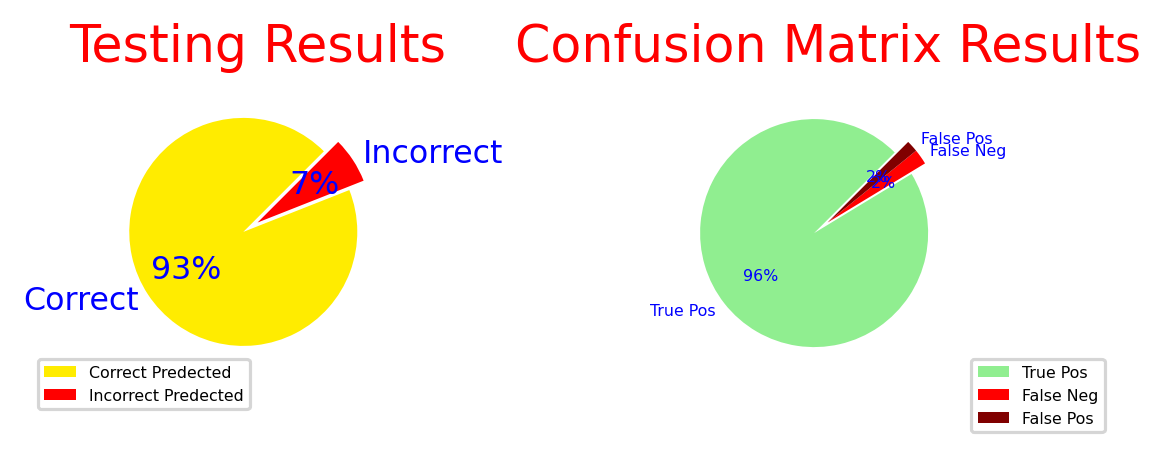

In [91]:
#pie chart visualisation of Results of Testing data

size=[(y_test == knn.predict(X_test)).sum(),(y_test != knn.predict(X_test)).sum()]
fig = plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#FFEC00",'red'])
ax1.set_title("Testing Results",fontdict={"size":16,"color":'red'})
ax1.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})

ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
size=[tp_fn,fn,fp]
offset = [0.15, 0.00,0.0]
ax2.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["lightgreen",'red',"maroon"])
ax2.set_title("Confusion Matrix Results",fontdict={"size":16,"color":'red'})
ax2.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})
plt.show()

In [92]:
print("Testing Datasets Results","--"*30)
print("Precision is {:0.02%} ".format(precision_score(y_test.values,knn.predict(X_test),average="macro")))
print("Recall is {:0.02%} ".format(recall_score(y_test.values,knn.predict(X_test),average="macro")))
print("F1-Score is {:0.02%} ".format(f1_score(y_test.values,knn.predict(X_test),average="macro")))

Testing Datasets Results ------------------------------------------------------------
Precision is 93.52% 
Recall is 93.29% 
F1-Score is 93.31% 


# Model 4 : DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
DTC = DecisionTreeClassifier(random_state=0)
transformer = TfidfTransformer()

In [95]:
X_train_DTC= transformer.fit_transform(X_train)
DTC.fit(X_train_DTC,y_train)

DecisionTreeClassifier(random_state=0)

In [96]:
decision_tree_valid_prediction = DTC.predict(X_valid)

In [97]:
(decision_tree_valid_prediction==y_valid).sum()

359

In [98]:
359/445

0.8067415730337079

In [99]:
(DTC.predict(X_test)==y_test).sum()

357

# Model 5 : RandomForestClassifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
#in algorithms like Random Forest TFIDF did not play much role in performance so we removed it
#transformer = TfidfTransformer()
#X_train_RFC= transformer.fit_transform(X_train)
X_train_RFC = X_train

In [287]:
RFC = RandomForestClassifier(n_estimators=150,max_depth=8,criterion='entropy')
RFC.fit(X_train_RFC,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=150)

In [288]:
random_forest_valid_prediction = RFC.predict(X_valid)

In [289]:
random_forest_valid_prediction_correct = (random_forest_valid_prediction==y_valid).sum()
random_forest_valid_prediction_incorrect = (random_forest_valid_prediction != y_valid).sum()

In [290]:
print("Accuracy Of RandomForestClassifier on Validation Dataset is \t{:.2%}".format
      (random_forest_valid_prediction_correct/y_valid.shape[0]))

Accuracy Of RandomForestClassifier on Validation Dataset is 	90.56%


In [291]:
RFC_CF_train = confusion_matrix(y_train,RFC.predict(X_train_RFC))
RFC_CF_train

array([[222,   6,   3,   0,   0],
       [  0, 319,   0,   0,   0],
       [  0,   0, 308,   0,   0],
       [  0,   5,   4, 230,   0],
       [  0,   5,   2,   0, 231]])

In [292]:
accuracy_score(y_train,RFC.predict(X_train_RFC)),accuracy_score(y_test,RFC.predict(X_test))

(0.9812734082397003, 0.9303370786516854)

In [159]:
RFC_CF_valid = confusion_matrix(y_valid,RFC.predict(X_valid))
RFC_CF_valid

array([[ 78,   2,   0,   4,   0],
       [  1,  82,   0,   0,   2],
       [  0,   1, 101,   0,   0],
       [  1,   2,   1,  76,   1],
       [  0,   7,   2,   0,  84]])

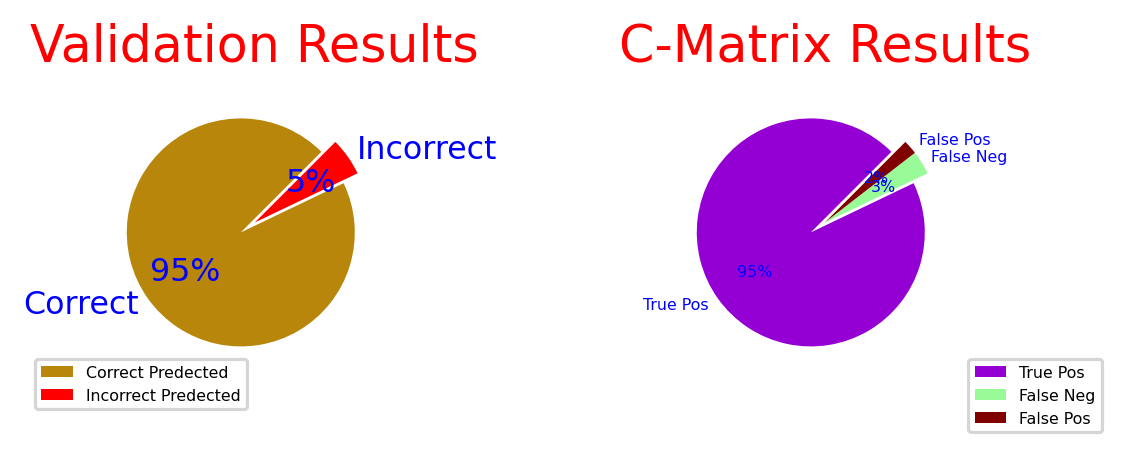

In [162]:
size=[(y_valid == RFC.predict(X_valid)).sum(),(y_valid != RFC.predict(X_valid)).sum()]
fig = plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["darkgoldenrod",'red'])
ax1.set_title("Validation Results",fontdict={"size":16,"color":'red'})
ax1.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})

ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
size=[abs(RFC_CF_valid.diagonal().sum()),abs(np.tril(RFC_CF_valid).sum()-RFC_CF_valid.diagonal().sum()),abs(np.triu(RFC_CF_valid).sum()-RFC_CF_valid.diagonal().sum())]

offset = [0.15, 0.00,0.0]
ax2.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["darkviolet",'palegreen',"maroon"])
ax2.set_title("C-Matrix Results",fontdict={"size":16,"color":'red'})
ax2.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})
plt.show()

In [169]:
print("Validation Datasets Results","--"*30)

print("Accuracy in Validation is \t{:0.02%} ".format(accuracy_score(y_valid.values,RFC.predict(X_valid))))
print("Precision is \t{:0.02%} ".format(precision_score(y_valid.values,RFC.predict(X_valid),average="macro")))
print("Recall is\t {:0.02%} ".format(recall_score(y_valid.values,RFC.predict(X_valid),average="macro")))
print("F1-Score is \t{:0.02%} ".format(f1_score(y_valid.values,RFC.predict(X_valid),average="macro")))

Validation Datasets Results ------------------------------------------------------------
Accuracy in Validation is 	94.61% 
Precision is 	94.68% 
Recall is	 94.50% 
F1-Score is 	94.51% 
